In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_venn as venn
%matplotlib inline

In [2]:
attribute = pd.read_csv('../input/attributes.csv')
product_description = pd.read_csv('../input/product_descriptions.csv')
test = pd.read_csv('../input/test.csv')
train = pd.read_csv('../input/train.csv')

In [3]:
attribute.head()

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [4]:
attribute.isnull().sum()

product_uid     155
name            155
value          2090
dtype: int64

In [5]:
attribute.value[0]

'Versatile connector for various 90\xc2\xb0 connections and home repair projects'

In [6]:
product_description.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [7]:
product_description.isnull().sum()

product_uid            0
product_description    0
dtype: int64

In [8]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [9]:
train.isnull().sum()


id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

In [10]:
test.head()

,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668


In [11]:
test.isnull().sum()

id               0
product_uid      0
product_title    0
search_term      0
dtype: int64

<matplotlib_venn._common.VennDiagram instance at 0x11db847a0>

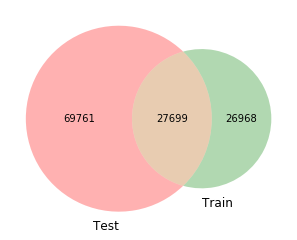

In [22]:
set_testId = set(test.product_uid.values)
set_trainId = set(train.product_uid.values)
venn.venn2([set_testId, set_trainId],['Test','Train'], alpha=0.3)

<matplotlib_venn._common.VennDiagram instance at 0x118fe33f8>

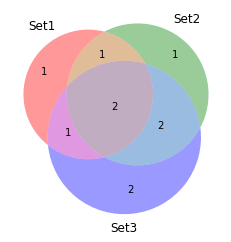

In [15]:
set_attr

<matplotlib_venn._common.VennDiagram instance at 0x1199010e0>

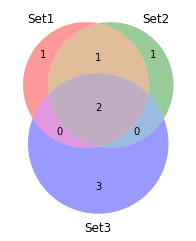

In [16]:
set1 = set(['A', 'B', 'C', 'D'])
set2 = set(['B', 'C', 'D', 'E'])
set3 = set(['C', 'D',' E', 'F', 'G'])

venn.venn3([set1, set2, set3], ('Set1', 'Set2', 'Set3'))